In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
data = pd.read_csv('D:\Projects\AI Project\Hospital-Readmission-Prediction\Data\diabetic_data.csv')
IDs = pd.read_csv('D:\Projects\AI Project\Hospital-Readmission-Prediction\Data\IDs_mapping.csv')

In [68]:
for (columnName, columnData) in data.items():
    print('Column Name : ', columnName)
    print(data[data[columnName] == '?'][columnName].count())

Column Name :  encounter_id
0
Column Name :  patient_nbr
0
Column Name :  race
2273
Column Name :  gender
0
Column Name :  age
0
Column Name :  weight
98569
Column Name :  admission_type_id
0
Column Name :  discharge_disposition_id
0
Column Name :  admission_source_id
0
Column Name :  time_in_hospital
0
Column Name :  payer_code
40256
Column Name :  medical_specialty
49949
Column Name :  num_lab_procedures
0
Column Name :  num_procedures
0
Column Name :  num_medications
0
Column Name :  number_outpatient
0
Column Name :  number_emergency
0
Column Name :  number_inpatient
0
Column Name :  diag_1
21
Column Name :  diag_2
358
Column Name :  diag_3
1423
Column Name :  number_diagnoses
0
Column Name :  max_glu_serum
0
Column Name :  A1Cresult
0
Column Name :  metformin
0
Column Name :  repaglinide
0
Column Name :  nateglinide
0
Column Name :  chlorpropamide
0
Column Name :  glimepiride
0
Column Name :  acetohexamide
0
Column Name :  glipizide
0
Column Name :  glyburide
0
Column Name :  tolb

In [69]:
for (columnName, columnData) in data.items():
    if(data[data[columnName] == '?'][columnName].count()/data[columnName].count() >= 0.9 ):
        data.drop(columnName,axis = 1, inplace = True)

In [70]:
for (columnName, columnData) in data.items():
    print('Column Name : ', columnName)
    print(data[data[columnName] == '?'][columnName].count())

Column Name :  encounter_id
0
Column Name :  patient_nbr
0
Column Name :  race
2273
Column Name :  gender
0
Column Name :  age
0
Column Name :  admission_type_id
0
Column Name :  discharge_disposition_id
0
Column Name :  admission_source_id
0
Column Name :  time_in_hospital
0
Column Name :  payer_code
40256
Column Name :  medical_specialty
49949
Column Name :  num_lab_procedures
0
Column Name :  num_procedures
0
Column Name :  num_medications
0
Column Name :  number_outpatient
0
Column Name :  number_emergency
0
Column Name :  number_inpatient
0
Column Name :  diag_1
21
Column Name :  diag_2
358
Column Name :  diag_3
1423
Column Name :  number_diagnoses
0
Column Name :  max_glu_serum
0
Column Name :  A1Cresult
0
Column Name :  metformin
0
Column Name :  repaglinide
0
Column Name :  nateglinide
0
Column Name :  chlorpropamide
0
Column Name :  glimepiride
0
Column Name :  acetohexamide
0
Column Name :  glipizide
0
Column Name :  glyburide
0
Column Name :  tolbutamide
0
Column Name :  pio

In [71]:
for (columnName, columnData) in data.items():
    print('Column Name : ', columnName)
    if np.issubdtype(columnData.dtype, np.number):
        Q1 = data[columnName].quantile(0.25)
        Q3 = data[columnName].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[columnName] > upper_bound) | (data[columnName] < lower_bound)]
        print(columnName)
        print(outliers[columnName].count()) 
        #data.clip(lower = lower_bound,upper=upper_bound)

Column Name :  encounter_id
encounter_id
0
Column Name :  patient_nbr
patient_nbr
247
Column Name :  race
Column Name :  gender
Column Name :  age
Column Name :  admission_type_id
admission_type_id
341
Column Name :  discharge_disposition_id
discharge_disposition_id
9818
Column Name :  admission_source_id
admission_source_id
6956
Column Name :  time_in_hospital
time_in_hospital
2252
Column Name :  payer_code
Column Name :  medical_specialty
Column Name :  num_lab_procedures
num_lab_procedures
143
Column Name :  num_procedures
num_procedures
4954
Column Name :  num_medications
num_medications
2557
Column Name :  number_outpatient
number_outpatient
16739
Column Name :  number_emergency
number_emergency
11383
Column Name :  number_inpatient
number_inpatient
7049
Column Name :  diag_1
Column Name :  diag_2
Column Name :  diag_3
Column Name :  number_diagnoses
number_diagnoses
281
Column Name :  max_glu_serum
Column Name :  A1Cresult
Column Name :  metformin
Column Name :  repaglinide
Colum

C:\Users\Kevin\AppData\Local\Temp\ipykernel_8104\2937409926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True, annot_kws={'size': 6.5})


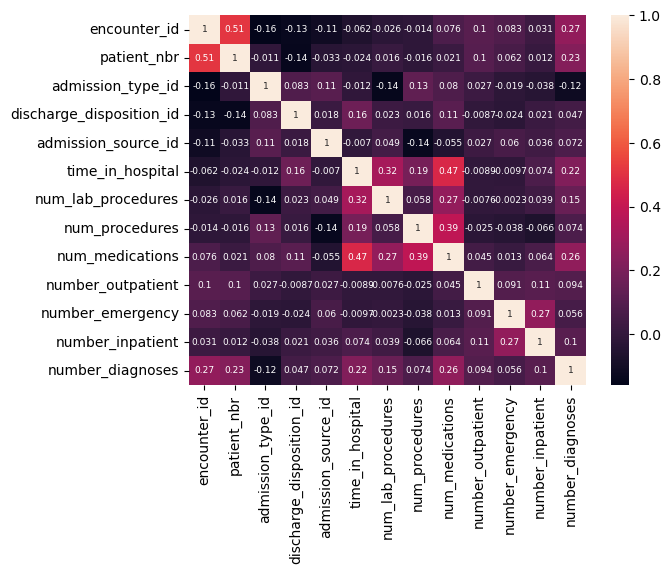

In [89]:
sns.heatmap(data.corr(),annot=True, annot_kws={'size': 6.5})
plt.show()